# **DL Assignment III**
## **Image Classification using CNNs**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load the datasets
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LP 5/fashion-mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LP 5/fashion-mnist_test.csv")

In [ ]:
# 2. Prepare features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [ ]:
# 3. Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 4. Reshape to (28, 28, 1) for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# 5. One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 6. Split off validation data from training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# 7. Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 8. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 9. Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.6888 - loss: 0.8839 - val_accuracy: 0.8528 - val_loss: 0.3998
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.8435 - loss: 0.4377 - val_accuracy: 0.8755 - val_loss: 0.3315
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.8679 - loss: 0.3670 - val_accuracy: 0.8817 - val_loss: 0.3077
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.8826 - loss: 0.3323 - val_accuracy: 0.8967 - val_loss: 0.2841
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8893 - loss: 0.3050 - val_accuracy: 0.8985 - val_loss: 0.2689
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8980 - loss: 0.2798 - val_accuracy: 0.9028 - val_loss: 0.2617
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9041 - loss: 0.2659 - val_accuracy: 0.9065 - val_loss: 0.2560
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9106 - loss: 0.2467 - 

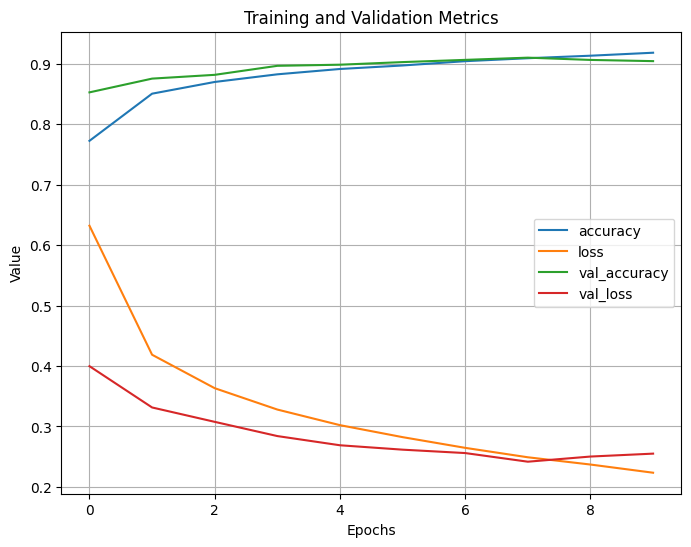

In [ ]:
# 10. Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 6))
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
# 11. Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9061 - loss: 0.2469

Test Loss: 0.2421
Test Accuracy: 0.9084
